### 2D Image Extraction
Here we are iterating through the T1 images and pull out the 120th image.
Build a df of those images, with the attached age of that brain scan

In [8]:
import numpy as np
import glob
import re

import matplotlib.pyplot as plt
import pandas as pd
import tqdm

In [9]:
eg = sorted(glob.glob('./Inputs/IXI-T1/IXI020-Guys-0700-T1.nii.gz'))

In [6]:
for e in eg:
    img = nib.load(e)
    img_data = img.get_data()
    img_data = np.asarray(img_data)  

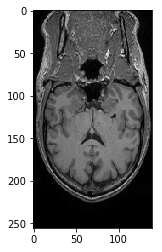

(256, 256, 140)

In [7]:
plt.imshow(img_data[112], cmap='gray')
plt.show()
img_data.shape

In [75]:
img_data.shape

(256, 256, 140)

In [76]:
slices = []
ID = []
files = sorted(glob.glob('./Inputs/IXI-T1/*.nii.gz'))
for f in tqdm.tqdm(files):
    #fetch each nii file and take only 120th slice
    img = nib.load(f)
    img_data = img.get_data()
    img_data = np.asarray(img_data)  
    img_data.astype(int)             
    img_data = img_data[120, :, :]
    slices.append(list(img_data.flatten()))
    
    #extract id to later append to df
    m = re.search('/[IXI]+(\d\d\d)', str(f))
    ID.append(m.group(1))


  3%|▎         | 20/581 [00:09<04:25,  2.11it/s]
Exception in thread Thread-5:
Traceback (most recent call last):
  File "/Users/Nahel/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/Nahel/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/Nahel/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100%|██████████| 581/581 [03:40<00:00,  2.64it/s]


In [77]:
slices = pd.DataFrame(slices, dtype=int)

In [78]:
slices['ID'] = ID
slices['ID'] = slices.ID.astype(int)

In [79]:
#adding AGE to slices
AGE = pd.read_csv('./AGE_ID.csv')
AGE = AGE.drop('Unnamed: 0',axis=1)
X = slices.merge(AGE,left_on='ID',right_on='IXI_ID')
X = X.drop(['ID','IXI_ID'],axis=1)

In [80]:
X.shape

(588, 38401)

In [81]:
X = X.dropna()

In [82]:
X.shape

(516, 38401)

In [83]:
X.to_csv('2D_120.csv')